In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [4]:
# loading the dataset
df = pd.read_csv(r'C:\Users\bukab\OneDrive\Desktop\DA-Tutorials\stock_data.csv', parse_dates=True, index_col='Date')
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [5]:
# dropping unwanted columns
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


Since, the volume column is of continuous data type, we will use line graph to visualize it. 

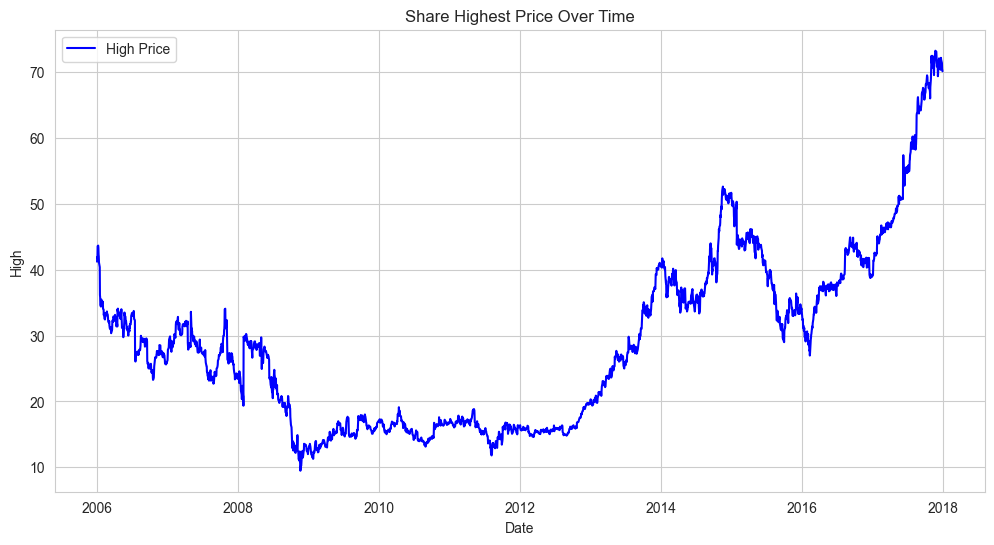

In [6]:
# plotting line plot for time series data
sns.set_style(style='whitegrid')

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# adding labels and titles
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
plt.show()

### Resampling 

To better understand the trend of the data we will use the resampling method, resampling the data on a monthly basis can provide a clearer view of trends and patterns, especially when we are dealing with daily data.

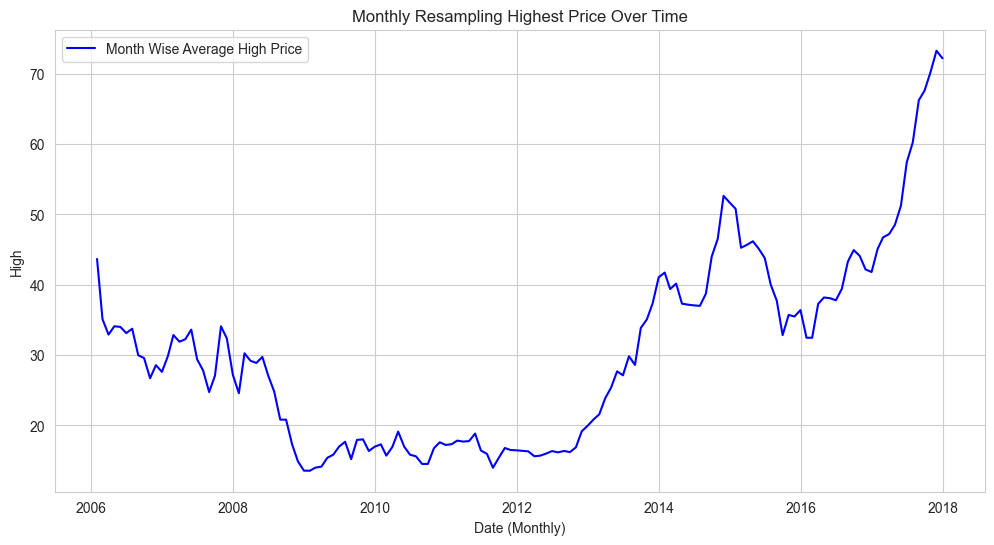

In [9]:
df_resampled = df.resample('M').max() # resampling to monthly frequency, using mean
sns.set_style(style='whitegrid')

# plotting the 'high' column, setting x as the resampled 'date'
plt.figure(figsize=(12,6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')
plt.show()

### Detecting Seasonality Using Auto Correlation

<Figure size 1200x600 with 0 Axes>

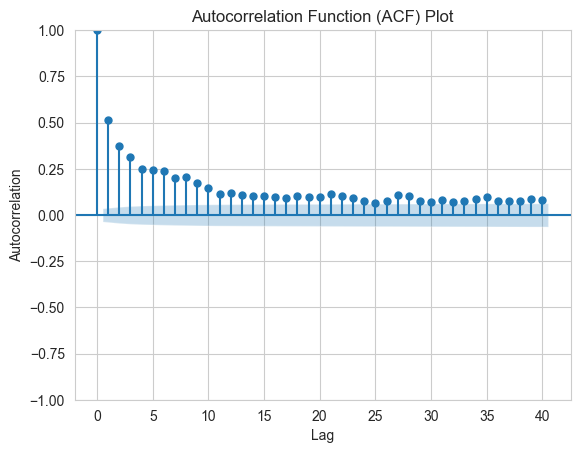

In [11]:
# plot the auto correlation function
plt.figure(figsize=(12,6))
plot_acf(df['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

The presence of seasonality is typically indicated by peaks or spikes at regular intervals, as there are none there is no seasonality in our data.
___

### Detecting Stationarity

We will perform the ADF test to formally test for stationarity.

The test is based on the;
* Null hypothesis that a unit root is present in the time series, indicating that the series is non-stationary.
* The alternative hypothesis is that the series is stationary after differencing (i.e., it has no unit root).

The ADF test employs an augmented regression model that includes lagged differences of the series to determine the presence of a unit root.

In [12]:
result = adfuller(df['High'])
print('ADF Statistic: ', result[0])
print('p-value:', result[1])
print('Critical Values: ', result[4])

ADF Statistic:  0.7671404880535945
p-value: 0.9910868050318213
Critical Values:  {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}



Here's a breakdown of the results:

* **ADF Statistic:** This value (-0.7671) is compared to critical values provided at different significance levels (1%, 5%, and 10%). In general, a more negative statistic indicates stronger evidence for stationarity.

* **p-value:** This value (0.9911) represents the probability of observing a test statistic as extreme or more extreme than the one obtained, assuming the null hypothesis of a non-stationary series is true. A higher p-value (greater than 0.05) suggests that we fail to reject the null hypothesis, meaning there's not enough evidence to say the series is stationary.

In this case, the ADF statistic is positive and the p-value is very high (close to 1), which suggests that we fail to reject the null hypothesis and there is not enough evidence to conclude that the time series is stationary.
___


### Smoothening the data using Differencing and Moving Average

Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality. 

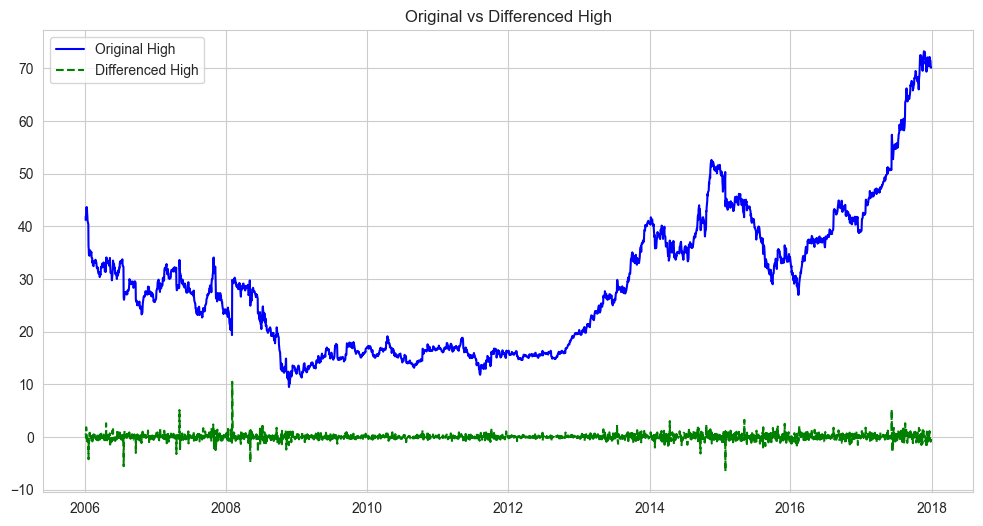

In [15]:
# differencing
df['high_diff'] = df['High'].diff()

# plotting
plt.figure(figsize=(12,6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

This differencing operation is commonly used to transform a time series into a new series that represents the changes between consecutive observations.

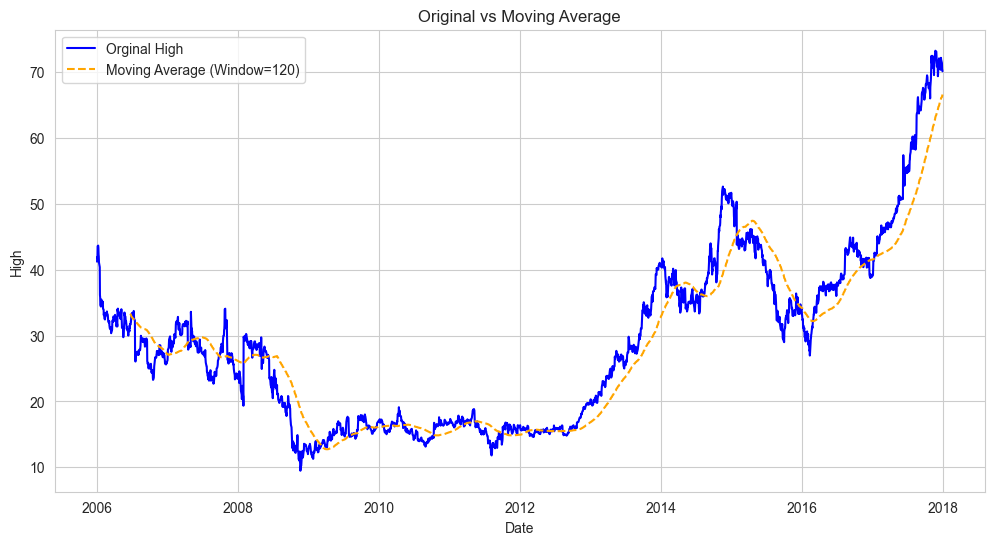

In [16]:
# moving average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# plotting
plt.figure(figsize=(12,6))

plt.plot(df['High'], label='Orginal High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

This calculates the moving average of the ‘High’ column with a window size of 120(A quarter) , creating a smoother curve in the ‘high_smoothed’ series. The plot compares the original ‘High’ values with the smoothed version.
___

### Original vs Differenced Data

In [18]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [19]:
# remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [20]:
result = adfuller(df['high_diff'])
print('ADF Statistic: ', result[0])
print('p-value:', result[1])
print('Critical Values: ', result[4])

ADF Statistic:  -12.14836747834325
p-value: 1.5912766134148351e-22
Critical Values:  {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}
